In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv(r'C:\Users\muhammadsaif\OneDrive\Desktop\Oasis-Infobyte\Task 4\archive\spam.csv', encoding='latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None

Missing Values:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Label Distribution:
Label
0    4825
1     747
Name: count, dtype: int64


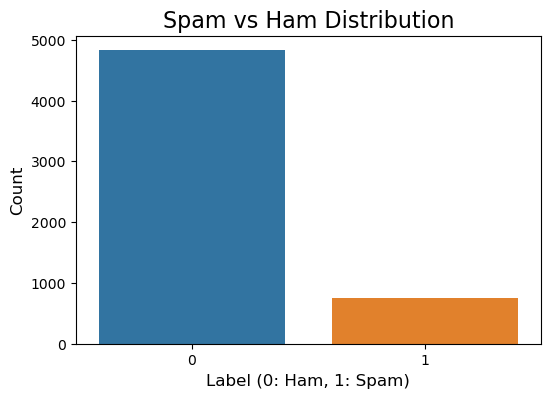

In [3]:
print("Dataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

df = df[['v1', 'v2']]
df.columns = ['Label', 'Message']

df = df.dropna(subset=['Message', 'Label'])

df['Label'] = df['Label'].map({'spam': 1, 'ham': 0})

print("\nLabel Distribution:")
print(df['Label'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='Label', data=df)
plt.title('Spam vs Ham Distribution', fontsize=16)
plt.xlabel('Label (0: Ham, 1: Spam)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [4]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

X = tfidf.fit_transform(df['Message'])
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (4457, 5000) (4457,)
Testing set shape: (1115, 5000) (1115,)


In [5]:
model = MultinomialNB()

model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


Accuracy on test set: 0.98

Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99       965
        Spam       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



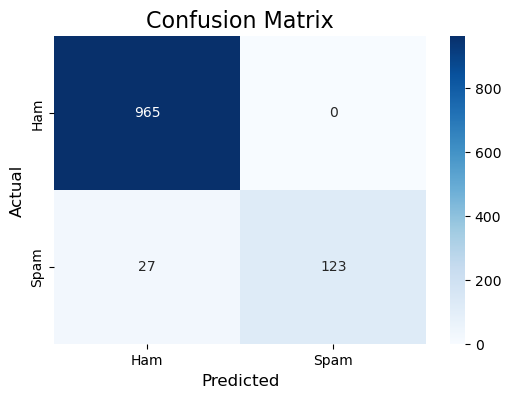


Prediction for new email: Ham


In [6]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

new_email = ["Win a million dollars now! Click here!"]
new_email_tfidf = tfidf.transform(new_email)
prediction = model.predict(new_email_tfidf)
print(f"\nPrediction for new email: {'Spam' if prediction[0] == 1 else 'Ham'}")